# Hoda dataset for machine learning

In [1]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize

### Loading a mat dataset with scipy


In [ ]:
!wget https://github.com/BKV15/SRU-deeplearning-workshop/blob/master/dataset/Data_hoda_full.mat?raw=true

In [15]:
dataset = io.loadmat('/content/a.mat?raw=true')

In [19]:
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

### Splitting data into train and test sets

In [30]:
#test and training set
X_train_original = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

### Displaying data

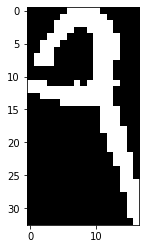

In [32]:
plt.imshow(X_train_original[123], cmap='gray')
plt.show()

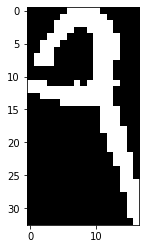

Label 123th image is: 9


In [36]:
i=123
image = X_train_original[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label {}th image is: {}".format(i, label))

### Resizing images into 5 x 5

In [38]:
#resize
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_original]
X_test_5by5 = [resize(img, (5, 5)) for img in X_test_original]

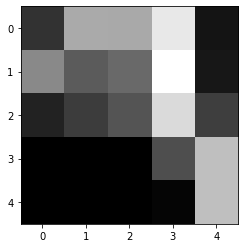

In [40]:
image = X_train_5by5[123]
plt.imshow(image, cmap='gray')
plt.show()

In [45]:
X_train_5by5[0].shape

(5, 5)

### Reshaping data


In [46]:
#reshape
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by5]

In [47]:
X_train[0].shape

(25,)

### Training a KNN model

In [56]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [59]:
knn.score(X_train , y_train)

0.946

In [60]:
knn.score(X_test , y_test)

0.955

In [61]:
y_pred = knn.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test , y_pred)

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 12,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 21,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  1,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  1, 15,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 19,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25]])